# The hippocampus as a predictive map
Kimberly L Stachenfeld, Matthew M Botvinick & Samuel J Gershman 

https://elifesciences.org/articles/34560

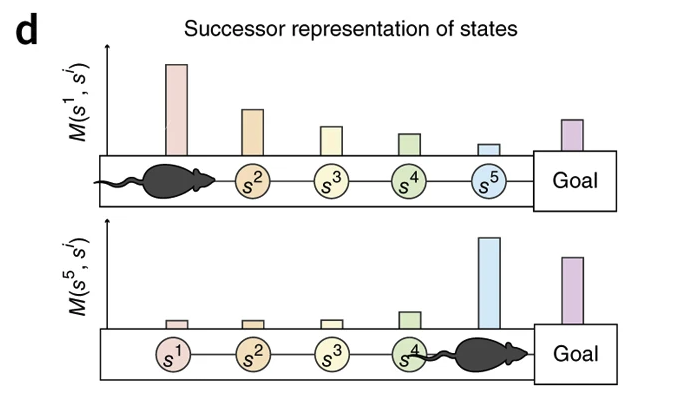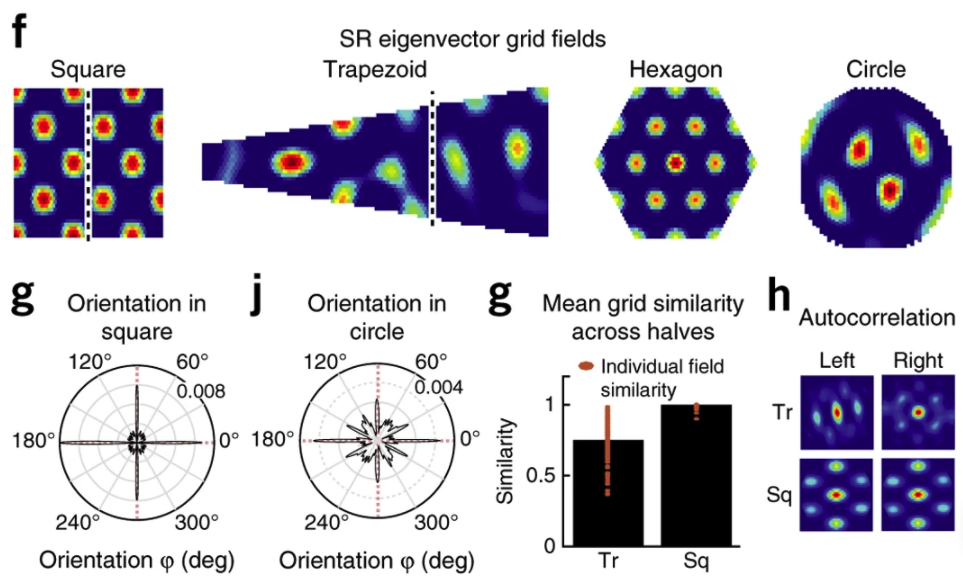

In [5]:
"""
Implementation for SR Kim
"""
import sys
sys.path.append("../")
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from tqdm import tqdm


from sehec.arenas import Simple2D, Sargolini2006, Hafting2008, BasicSargolini2006
from sehec.agents import SR


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

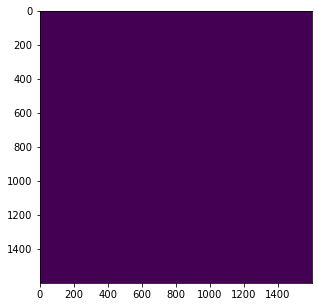

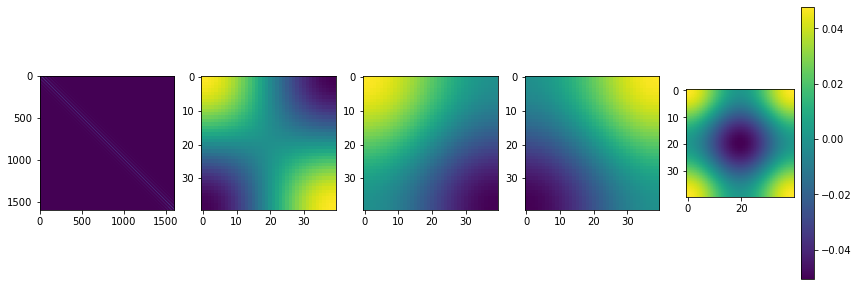

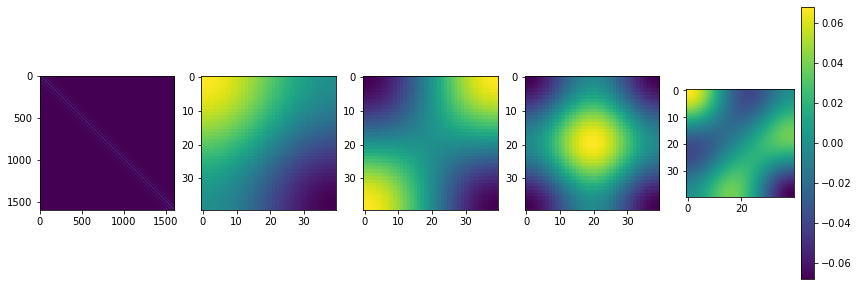

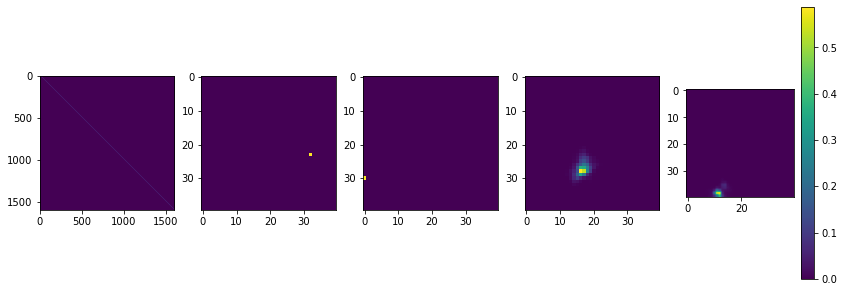

In [2]:
# Create an env
room_width = [-10,10]
room_depth = [-10,10]
env_name = "env_example"
time_step_size = 1
agent_step_size = 0.5


# Init environment
env = Simple2D(environment_name=env_name,
               arena_x_limits = room_width,
               arena_y_limits = room_depth,
               time_step_size = time_step_size,
               agent_step_size = agent_step_size)

discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 100
n_episode = 100
state_density = int(1 / agent_step_size)

twoDvalue=True
agent = SR(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
               room_width=env.room_width, room_depth=env.room_depth, state_density=state_density,twoD=twoDvalue)

# Choose your function depending on the type of env '2D_env' or '1D_env' + initialisies the smart as well
# Only run if twoDvalue=True
sr = agent.update_successor_rep()  # Choose your type of Update
sr_td = agent.update_successor_rep_td_full()  # Choose your type of Update
sr_sum= agent.successor_rep_sum()
agent.plot_eigen(sr, save_path=None)
agent.plot_eigen(sr_sum, save_path=None)
agent.plot_eigen(sr_td, save_path=None)

100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

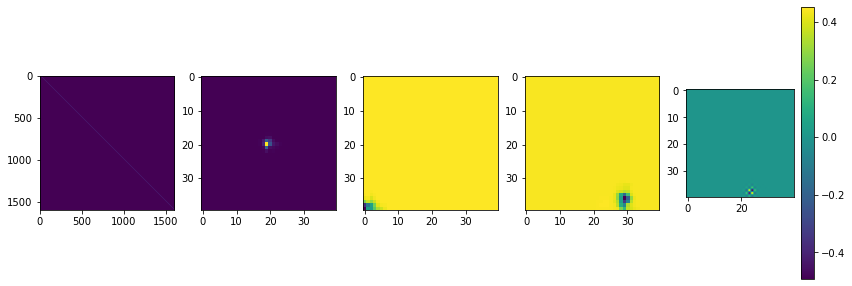

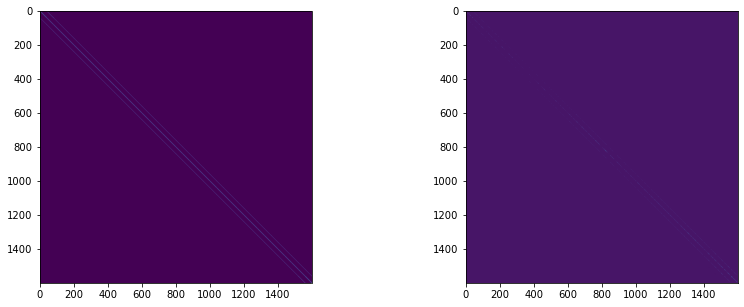

In [3]:
plot_every = 10000
total_iters = 0
obs, state = env.reset()
obs = obs[:2]
for i in tqdm(range(n_episode)):
    for j in range(t_episode):
        action = agent.act(obs)  # the action is link to density of state to make sure we always land in a new
        K  = agent.update()
        obs, state, reward = env.step(action)
        obs = obs[:2]
        total_iters += 1
        if total_iters % plot_every == 0:
            agent.plot_eigen(K, save_path=None)

T = agent.get_T_from_M(K)
agent.plot_transition(T, save_path=None)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

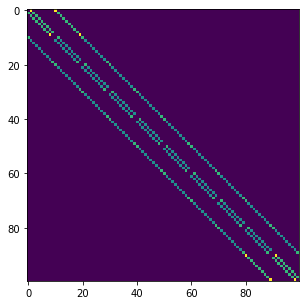

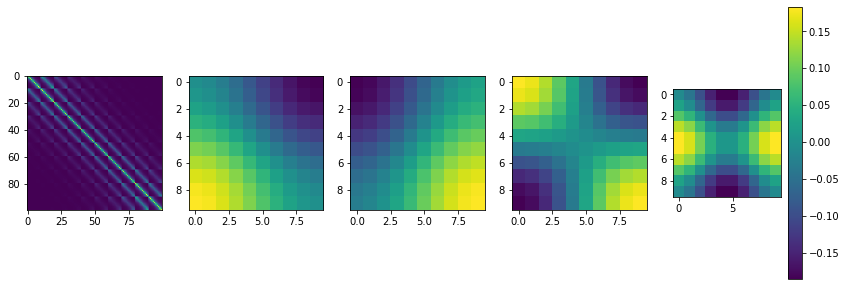

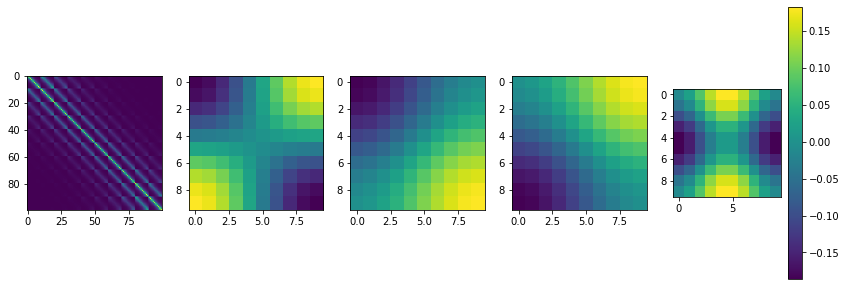

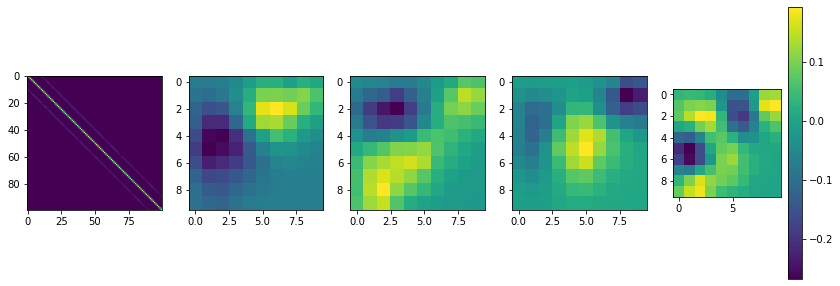

In [6]:
data_path = data_path = "../../sehec/experiments/sargolini_2006/"
env = BasicSargolini2006(data_path=data_path,
                         time_step_size=0.1,
                         agent_step_size=None)

agent_step_size = 10
discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 100
n_episode = 50
state_density = (1 / agent_step_size)
twoDvalue = True

agent = SR(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
               room_width=env.room_width, room_depth=env.room_depth, state_density=state_density, twoD=twoDvalue)

sr = agent.update_successor_rep()  # Choose your type of Update
sr_td = agent.update_successor_rep_td_full()  # Choose your type of Update
sr_sum = agent.successor_rep_sum()
agent.plot_eigen(sr, save_path=None)
agent.plot_eigen(sr_sum, save_path=None)
agent.plot_eigen(sr_td, save_path=None)
       

100%|██████████| 100/100 [00:00<00:00, 122.94it/s]


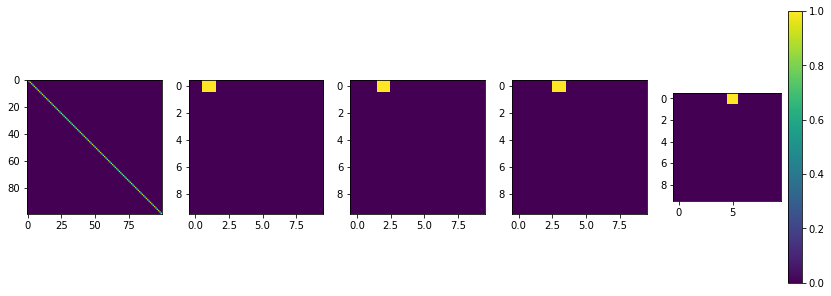

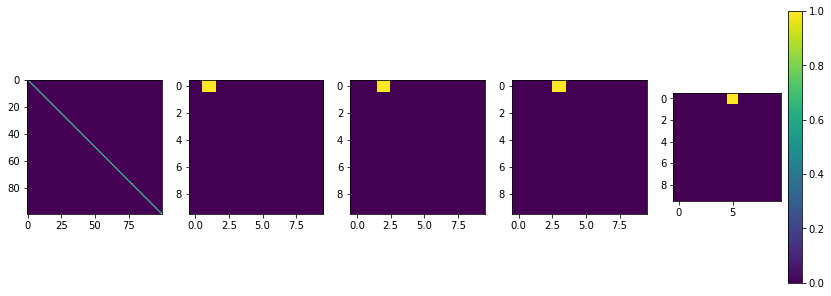

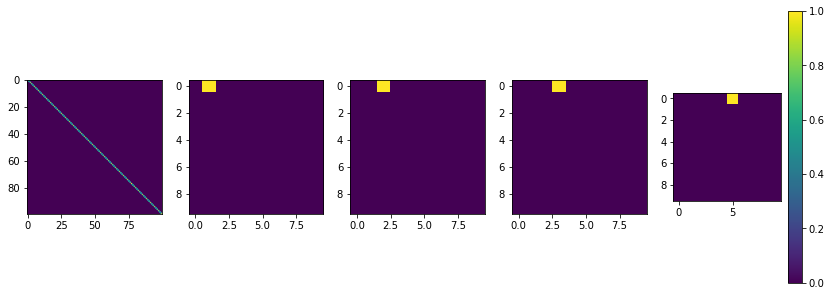

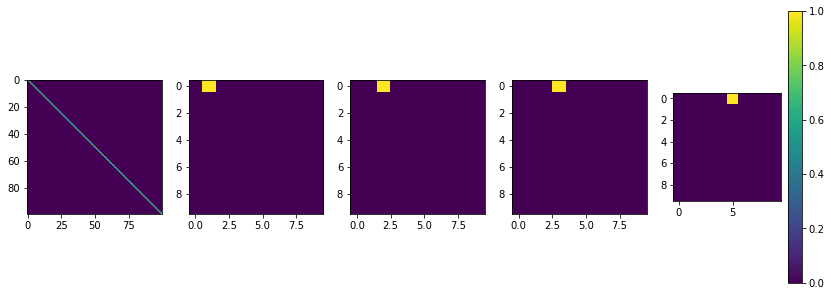

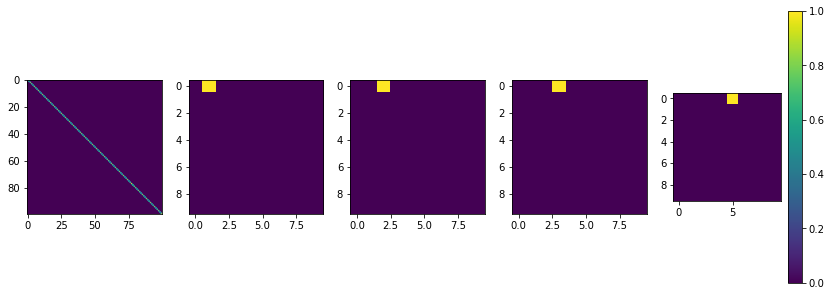

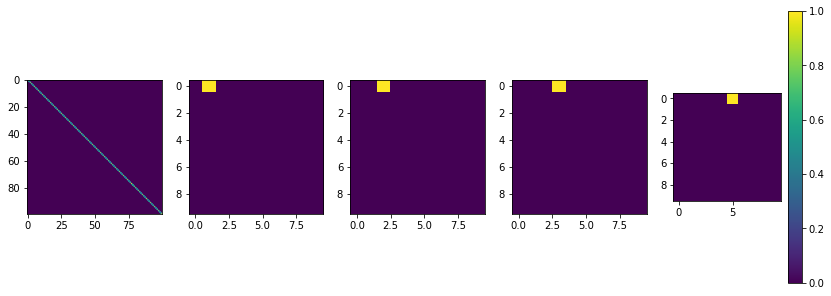

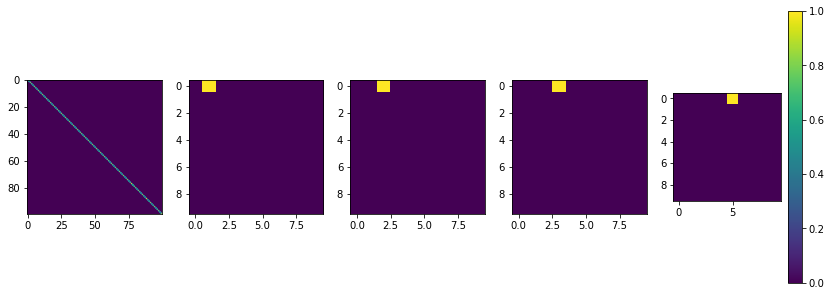

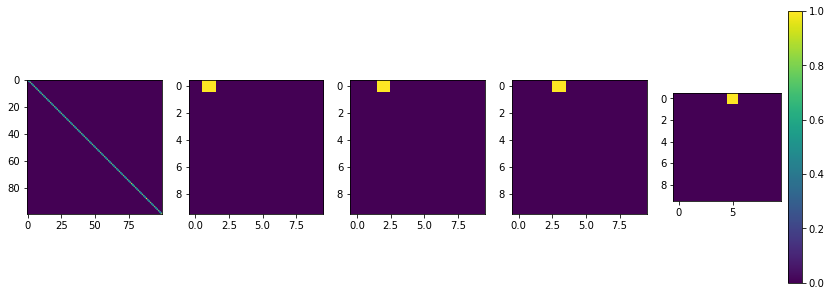

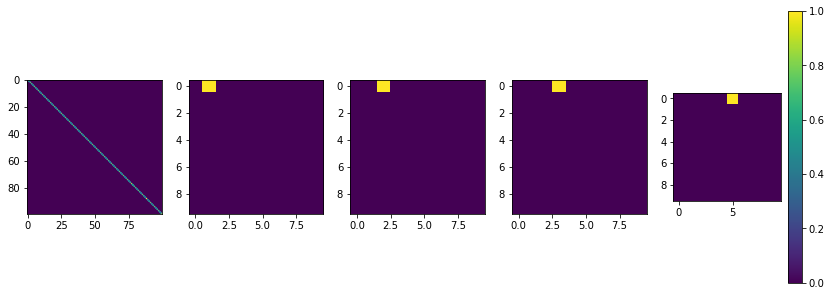

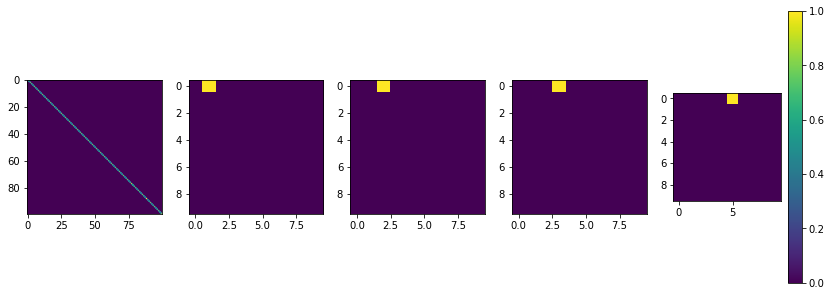

In [7]:
plot_every = 10
total_iters = 0
obs, state = env.reset()
obs = obs[:2]
for i in tqdm(range(100)):
# Observe to choose an action
    action = agent.act(obs)  # the action is link to density of state to make sure we always land in a new
    K  = agent.update()
    obs, state, reward = env.step(action)
    obs= obs[:2]
    total_iters += 1
    if total_iters % plot_every == 0:
        agent.plot_eigen(K, save_path=None)